# WeatherPy

---

## Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount pearl
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | kenai
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | vilyuysk
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | chonchi
Processing Record 8 of Set 1 | port douglas
Processing Record 9 of Set 1 | betio village
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | mae hong son
Processing Record 12 of Set 1 | utrik
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | petropavlovsk-kamchatsky
Processing Record 15 of Set 1 | atar
Processing Record 16 of Set 1 | mil'kovo
Processing Record 17 of Set 1 | vilhena
Processing Record 18 of Set 1 | tsengel
Processing Record 19 of Set 1 | barra de santo antonio
Processing Record 20 of Set 1 | yasnyy
Processing Record 21 of Set 1 | sainte-menehould
Processing Record 22 of Set 

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount pearl,47.5166,-52.7813,278.79,71,75,11.32,CA,1698624783
1,hermanus,-34.4187,19.2345,286.42,64,0,10.33,ZA,1698624534
2,kenai,60.5544,-151.2583,279.20,80,100,8.75,US,1698624824
3,port-aux-francais,-49.3500,70.2167,275.07,70,100,11.06,TF,1698624629
4,vilyuysk,63.7553,121.6247,258.71,97,61,2.24,RU,1698624824


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("Resources/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("Resources/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount pearl,47.5166,-52.7813,278.79,71,75,11.32,CA,1698624783
1,hermanus,-34.4187,19.2345,286.42,64,0,10.33,ZA,1698624534
2,kenai,60.5544,-151.2583,279.20,80,100,8.75,US,1698624824
3,port-aux-francais,-49.3500,70.2167,275.07,70,100,11.06,TF,1698624629
4,vilyuysk,63.7553,121.6247,258.71,97,61,2.24,RU,1698624824


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

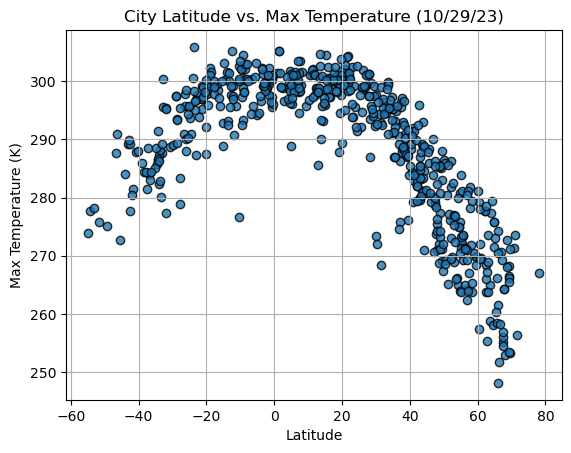

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (K)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

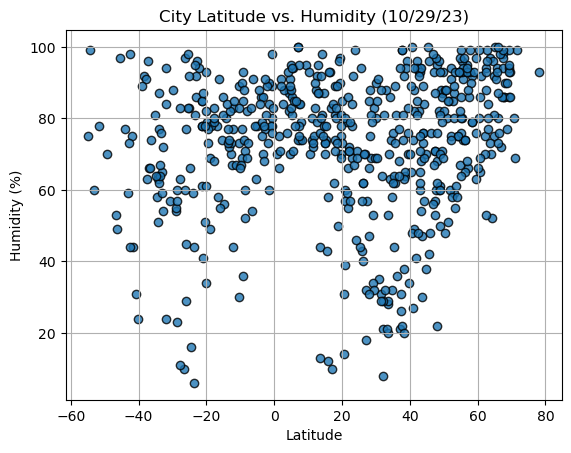

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

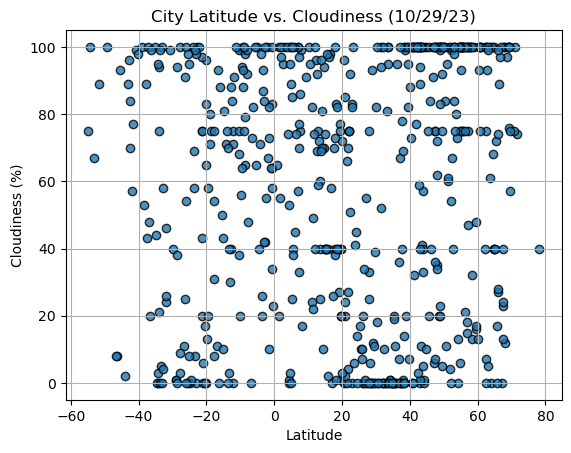

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Resources/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

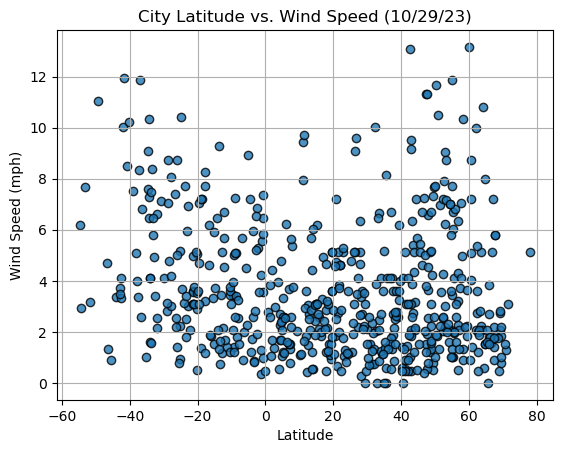

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
def plot_linear_regression(x_values, y_values, title):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"The r-value is: {r_value:.3f}")
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept

    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, (x_values.min() + 20, y_values.min()), fontsize=15, color="red")
    
    # Add labels and title
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show()


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount pearl,47.5166,-52.7813,278.79,71,75,11.32,CA,1698624783
2,kenai,60.5544,-151.2583,279.20,80,100,8.75,US,1698624824
4,vilyuysk,63.7553,121.6247,258.71,97,61,2.24,RU,1698624824
8,betio village,1.3580,172.9211,305.17,75,100,3.84,KI,1698624825
9,olonkinbyen,70.9221,-8.7187,273.50,69,100,1.27,SJ,1698624825


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,286.42,64,0,10.33,ZA,1698624534
3,port-aux-francais,-49.3500,70.2167,275.07,70,100,11.06,TF,1698624629
5,puerto natales,-51.7236,-72.4875,275.86,78,89,3.16,CL,1698624824
6,chonchi,-42.6128,-73.8092,277.71,98,70,4.11,CL,1698624824
7,port douglas,-16.4833,145.4667,298.56,58,93,4.62,AU,1698624824


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.875


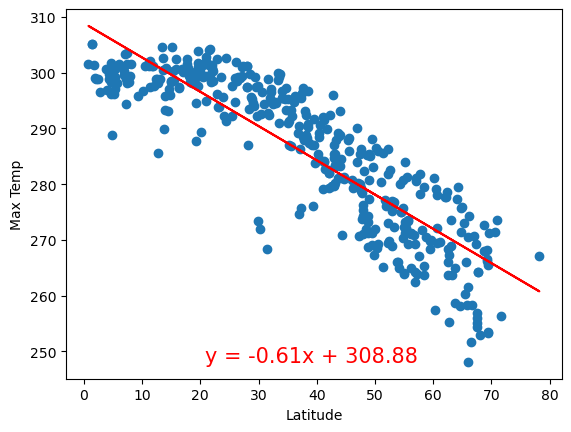

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp')

**Discussion about the linear relationship:** 

- Correlation Trend: Latitude and Max Temp share an inverse relation. The rise in latitude (going from equator to poles) witnesses a fall in maximum temperature.

- Linear Relationship: The linear equation is y=−0.6x+308.88. This implies a 0.6 units temperature drop for every unit latitude rise. A y-intercept of 308.88 means an estimated max temperature at 0 latitude.

- Data Congruence: Several data markers align well with the regression line, showing a good model fit. Yet, similar to the earlier graph, some markers deviate. It points out that other variables or inconsistencies exist beyond this linear correlation.

- Data Extent: Latitude stretches from around 0 to near 80, while max temperature spans roughly from 250 to just above 310.

- Data Spread: Data markers seem uniformly spaced over the latitude spectrum, with a minor density between 20 and 50 latitudes.

The plot hints at a typical trend: moving away from the equator (with latitudes nearing 0) to higher latitudes causes a dip in max temperature. This aligns with the globally accepted idea of cooler climates away from the equator.

The r-value is: 0.755


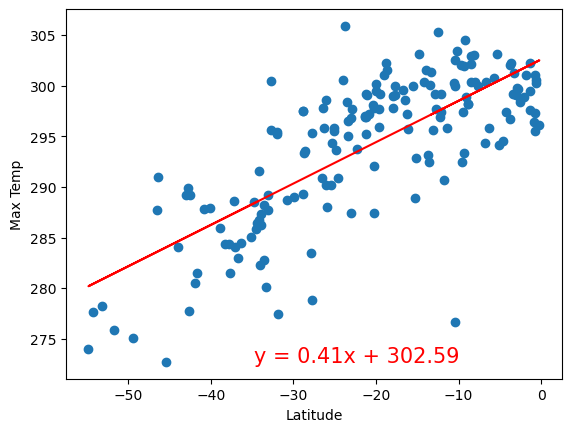

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp')

**Discussion about the linear relationship:** 

- The scatter plot unveils a clear trajectory in the relationship between "Latitude" and "Max Temp". One can clearly observe that as the latitude grows, especially when moving from the larger negative values towards 0, there’s an apparent increase in the maximum temperature.

- Diving deeper, the trendline provides the formula y=0.41x+302.59. Breaking this down, it indicates that for every unitary ascent in latitude, there's a 0.41 unit surge in maximum temperature. The 302.59 value, standing as the y-intercept, gives a projection of the peak temperature at the equator.

- While a majority of data points huddle around the regression line, indicating a strong linear relationship, certain anomalies are also present. These exceptions underscore the possibility of other factors that the linear model might miss. Most of these points are clustered in the latitude range of -30 to -10, with their max temperatures majorly spanning between 290 and 305. The entirety of the latitude data stretches from about -50, inching just past 0, whereas the max temperature wavers between a chilly 275 and a slightly warmer mark of just beyond 310.

Even though the analysis strongly suggests warmer temperatures as we inch closer to the equator, the inconsistencies in data hint at other potential determinants.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.146


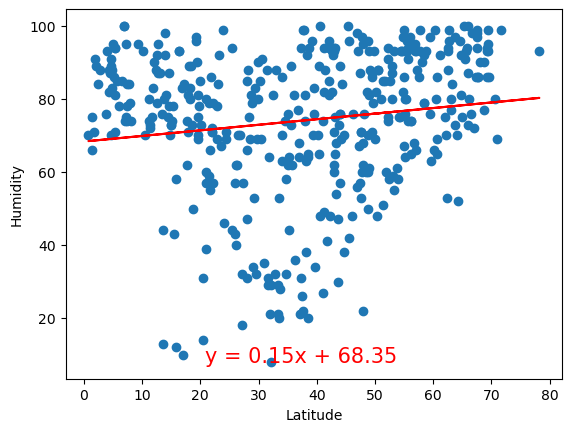

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity')

The r-value is: 0.198


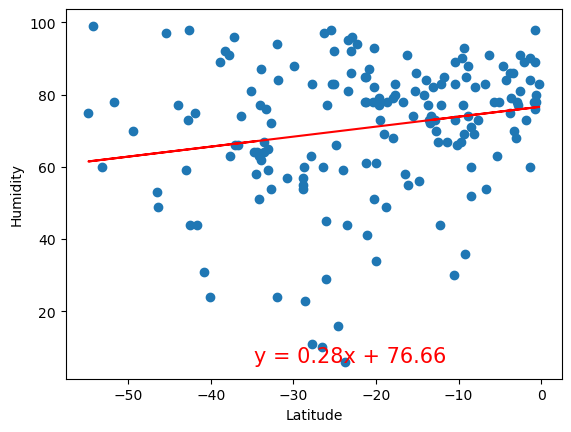

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity')

**Discussion about the linear relationship:** 

- Correlation Insight: A notable upward trend is observed between "Latitude" and "Humidity". As we transition from southern latitudes toward the equator, the humidity appears to rise.

- Line of Regression: This trend can be represented mathematically by y=0.28x+76.66. In essence, with every unitary shift in latitude, there's a corresponding 0.28 unit change in humidity. A y-intercept of 76.66 gives an estimate of humidity at the equator.

- Data Disparity: A considerable deviation of individual data points from the regression line underscores that this linear model represents just a general pattern, not the entirety of data variations. Latitude values present diverse humidity readings.

- Data Span: We observe latitude readings from roughly -50 up to 0. Humidity, on the other hand, fluctuates between an estimated 20 and 100.

- Overall Distribution: The data exhibits a wide distribution with distinct groupings at different humidity levels across the latitude spectrum.

There exists an overarching positive correlation between latitude and humidity as portrayed by our regression analysis. However, the scattered nature of the data points suggests other influencing variables that this linear interpretation may overlook.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.142


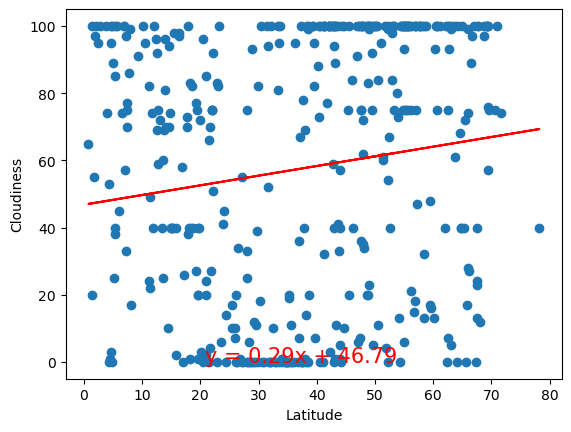

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness')

The r-value is: 0.072


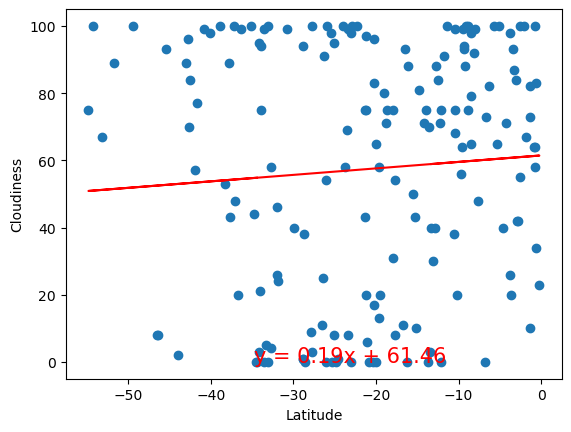

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness')


**Discussion about the linear relationship:**
- Positive Correlation: The graph indicates a positive correlation between "Latitude" and "Cloudiness". As the latitude values move from a higher southern latitude closer to the equator (i.e., as they increase or get less negative), there tends to be a slight increase in cloudiness.

- Regression Line: The red line is the regression line represented by the equation y=0.19x+61.46. This implies that for each unit increase in latitude, the cloudiness increases by roughly 0.19 units. The y-intercept of 61.46 is the estimated cloudiness when the latitude is 0.

- Spread of Data Points: The data points are widely dispersed around the regression line. This indicates that while the linear model captures a general trend, there's a significant variability in the data, suggesting that other factors might be influencing cloudiness apart from just latitude.

- Range of Data: The latitude values stretch from around -50 to 0. Cloudiness values vary from close to 0 to 100.

- Data Distribution: The data distribution seems quite scattered, with data points distributed across the entire range of cloudiness values for the given latitude range.

To sum up, there's a general positive trend between latitude and cloudiness as indicated by the regression line. However, the spread of the data points suggests that while latitude might have an effect on cloudiness, there are other factors contributing to the observed cloudiness values that are not captured in this simple linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.114


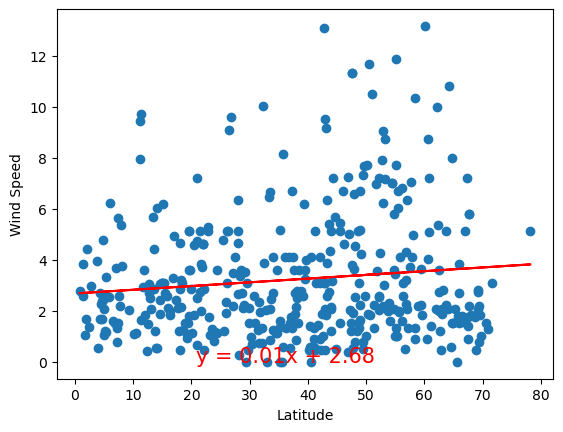

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed')

The r-value is: -0.291


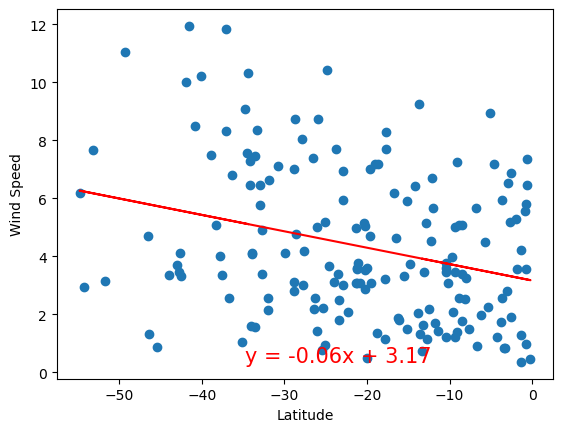

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed')

**Discussion about the linear relationship:**

- Correlation Insight: The illustration portrays an inverse relationship between "Latitude" and "Wind Speed." As we shift from extreme southern latitudes closer to the equator, there's a subtle reduction in wind speed.

- Line of Regression: A notable red line signifies the regression, which is mathematically y=−0.07x+2.77. This denotes that wind speed dips by roughly 0.07 units for every unit uptick in latitude. At a latitude of 0, the estimated wind speed is 2.77.

- Data Distribution: Data points exhibit a broad scatter around the regression line. This implies a noticeable trend via the linear representation, but the variability in the data cannot be ignored. It hints that variables other than just latitude might impact wind speed.

- Data Range: For latitude, the data starts around -50 and peaks close to 0. Wind speeds, on the other hand, begin near 0 and cap at approximately 12.

- Observation Distribution: Data points are not densely packed; they're spread out with noticeable groups, especially at lower wind speeds for the mentioned latitudinal range.

To summarize, while the depiction insinuates a modest wind speed reduction as we go northwards from the southernmost latitudes to the equator, the dispersed data suggests a weak correlation, indicating other determinants in play when gauging wind speed across latitudes.